# Exercise 2.1 - Unsupervised Learning Algorithms

This script contains the following parts:

1. Importing Libraries and Data (includes PCA-d data and Weather Predictions Data) 
2. Rerun Dendrograms with Reduced Data

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import operator

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Set path

path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 2'

In [3]:
# Import original weather data

dfPCA = pd.read_csv(os.path.join(path, '02 Data', '2000_PCA.csv'))

# Check

dfPCA

,Unnamed: 0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18
0,0,-12.303670,3.984468,-4.650371,-1.626903,-0.087554,1.439353,-1.826198,1.942304,1.901166,-0.850767,2.228672,1.752885,1.487777,-0.507642,0.825326,-0.918552,0.232513,0.977350
1,1,-11.275915,4.828021,-4.950137,-0.249943,-1.038258,0.249952,-0.857263,0.264164,1.678914,-0.594859,1.329267,1.429538,0.955675,-1.355736,0.443111,-0.849875,-0.825667,0.820520
2,2,-10.795703,3.593919,-4.657376,2.800168,0.461898,-0.555462,0.453382,-0.976426,-0.300677,-0.428805,1.823617,0.519961,1.494393,0.786293,0.095312,-0.170232,-0.911694,-0.864427
3,3,-9.744379,2.305812,-3.686662,2.348202,2.362939,1.425954,1.029055,-2.934832,0.312609,4.451172,2.081709,0.976015,0.308694,1.114285,0.402117,1.475583,-0.614444,-1.089527
4,4,-10.362477,3.885228,-0.191965,2.644560,-3.067238,0.270308,0.628176,0.284416,-0.077673,1.534767,0.492276,0.297664,0.818941,-1.642109,0.501668,0.143905,0.748378,-0.167533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,-11.870624,-8.194647,5.335100,-2.347469,-0.841473,3.807072,-3.878817,-1.418181,1.924888,-0.257522,-1.384876,0.384699,-0.611195,-1.498553,-0.530841,0.379991,-1.307357,-0.132122
362,362,-12.631110,-7.532162,6.400491,-2.044389,-1.351738,0.835748,-4.023749,-1.193028,1.291244,2.150128,-5.133528,1.200224,6.024627,-1.739505,1.456915,6.208486,0.968855,-2.921427
363,363,-13.192649,-6.635848,6.397488,-3.033823,-0.821675,0.091561,-2.248851,-1.522177,-1.009005,1.797330,-2.274548,2.116254,4.811218,-0.547781,0.597738,5.889620,-0.492765,-0.450045
364,364,-13.195805,-3.368171,3.938788,-3.934247,1.822820,0.547590,-4.354749,-0.031681,2.953673,3.242879,-1.717557,3.129289,1.599187,-1.607377,2.866124,-0.280458,0.267135,-2.682721


In [4]:
dfPCA.drop(columns = ['Unnamed: 0'], inplace = True)
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18
0,-12.303670,3.984468,-4.650371,-1.626903,-0.087554,1.439353,-1.826198,1.942304,1.901166,-0.850767,2.228672,1.752885,1.487777,-0.507642,0.825326,-0.918552,0.232513,0.977350
1,-11.275915,4.828021,-4.950137,-0.249943,-1.038258,0.249952,-0.857263,0.264164,1.678914,-0.594859,1.329267,1.429538,0.955675,-1.355736,0.443111,-0.849875,-0.825667,0.820520
2,-10.795703,3.593919,-4.657376,2.800168,0.461898,-0.555462,0.453382,-0.976426,-0.300677,-0.428805,1.823617,0.519961,1.494393,0.786293,0.095312,-0.170232,-0.911694,-0.864427
3,-9.744379,2.305812,-3.686662,2.348202,2.362939,1.425954,1.029055,-2.934832,0.312609,4.451172,2.081709,0.976015,0.308694,1.114285,0.402117,1.475583,-0.614444,-1.089527
4,-10.362477,3.885228,-0.191965,2.644560,-3.067238,0.270308,0.628176,0.284416,-0.077673,1.534767,0.492276,0.297664,0.818941,-1.642109,0.501668,0.143905,0.748378,-0.167533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-11.870624,-8.194647,5.335100,-2.347469,-0.841473,3.807072,-3.878817,-1.418181,1.924888,-0.257522,-1.384876,0.384699,-0.611195,-1.498553,-0.530841,0.379991,-1.307357,-0.132122
362,-12.631110,-7.532162,6.400491,-2.044389,-1.351738,0.835748,-4.023749,-1.193028,1.291244,2.150128,-5.133528,1.200224,6.024627,-1.739505,1.456915,6.208486,0.968855,-2.921427
363,-13.192649,-6.635848,6.397488,-3.033823,-0.821675,0.091561,-2.248851,-1.522177,-1.009005,1.797330,-2.274548,2.116254,4.811218,-0.547781,0.597738,5.889620,-0.492765,-0.450045
364,-13.195805,-3.368171,3.938788,-3.934247,1.822820,0.547590,-4.354749,-0.031681,2.953673,3.242879,-1.717557,3.129289,1.599187,-1.607377,2.866124,-0.280458,0.267135,-2.682721


## 2. Dendrograms

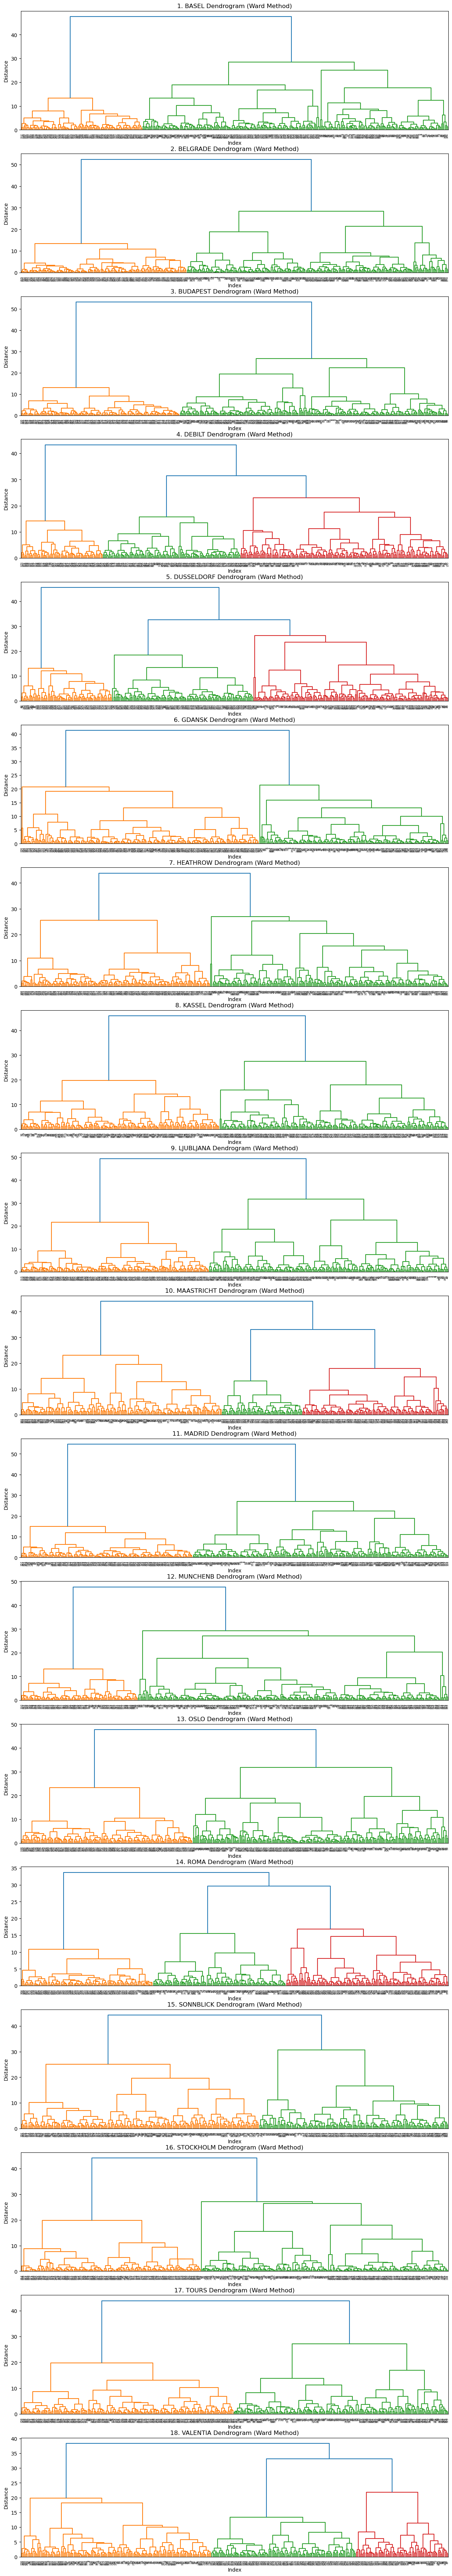

In [16]:
# Dendrogram for clustering by the Ward Method

figure, ax = plt.subplots(18, 1, figsize=(15,90))
count=0

for count in range(18):
        station = locations[count] 
        station_columns = [col for col in columns if col.split('_')[0] == station]
        distance_single = linkage(scaled_2000.loc[:, station_columns,], method = "ward")
        dendrogram(distance_single, leaf_rotation=90, ax=ax[count])
        ax[count].set_xlabel('Index');
        ax[count].set_ylabel('Distance'); 
        ax[count].set_title(str(count+1) + '. ' + station +' Dendrogram (Ward Method)')

In [6]:
# create columns list
columns = dfPCA.columns.to_list()
# Has been checked

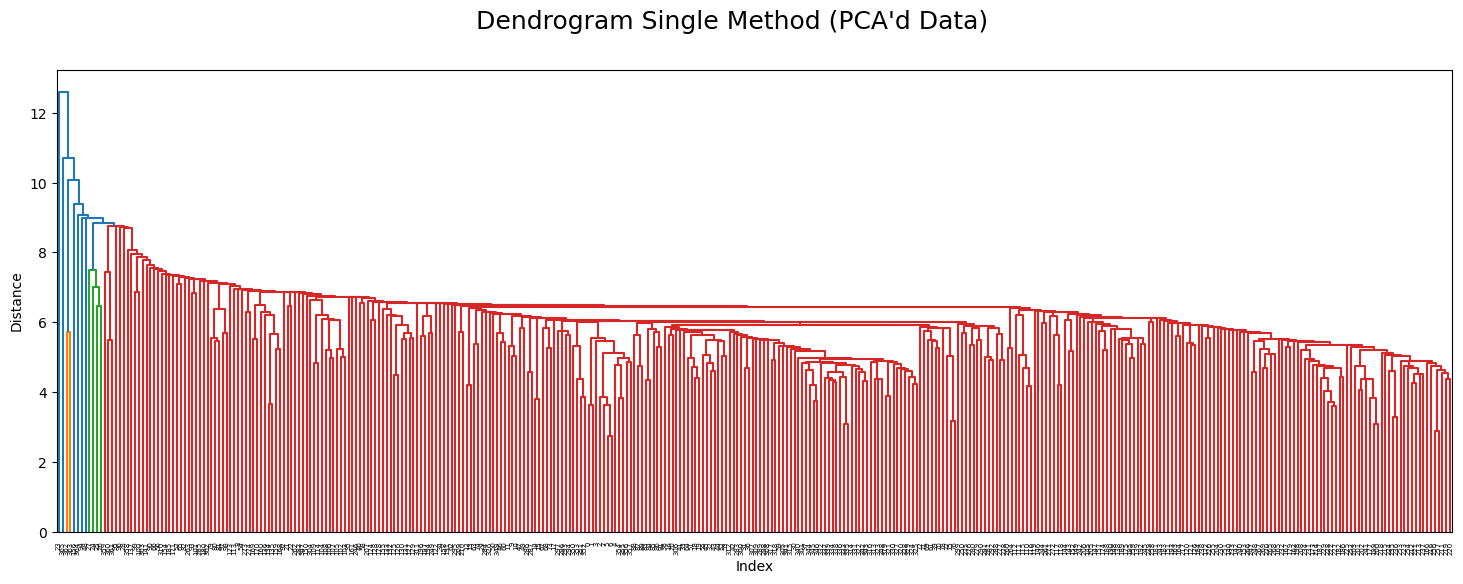

In [14]:
distance_single = linkage(dfPCA.loc[:, columns,], method = "single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method (PCA'd Data)",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'PCAd Dendrogram - Simple Method.png'), bbox_inches = 'tight') # Save
plt.show()

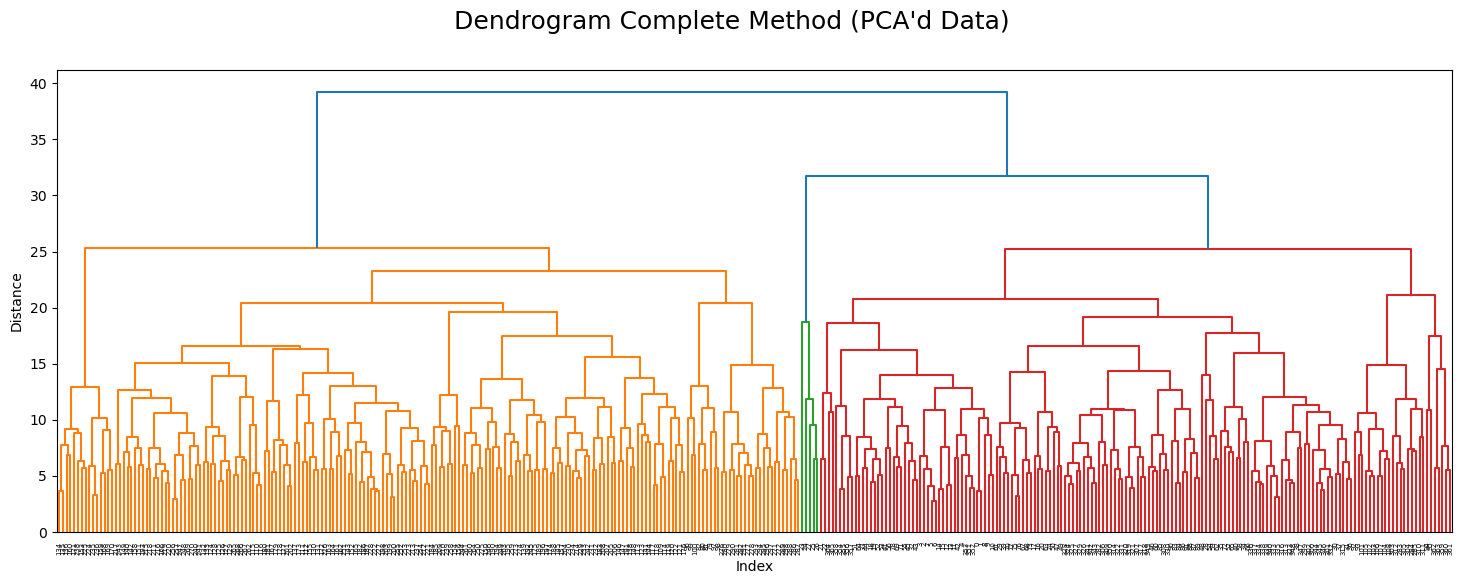

In [15]:
distance_single = linkage(dfPCA.loc[:, columns,], method = "complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method (PCA'd Data)",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'PCAd Dendrogram - Complete Method.png'), bbox_inches = 'tight') # Save
plt.show()

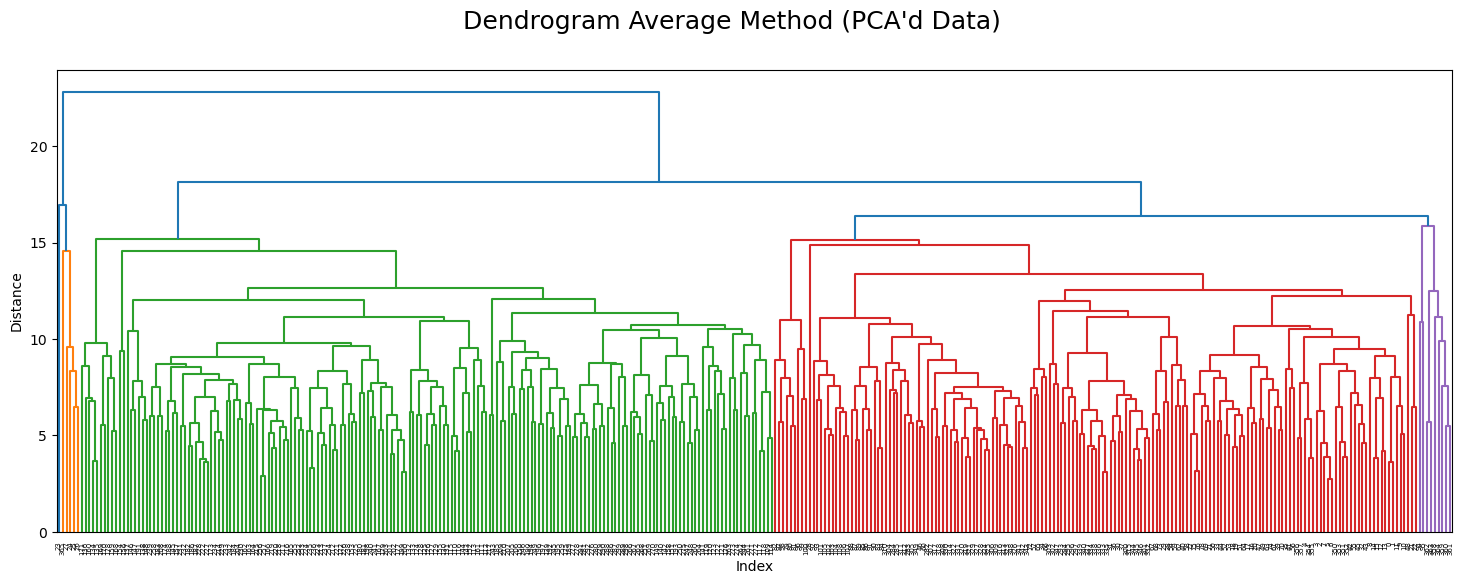

In [16]:
distance_single = linkage(dfPCA.loc[:, columns,], method = "average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method (PCA'd Data)",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'PCAd Dendrogram - Average Method.png'), bbox_inches = 'tight') # Save
plt.show()

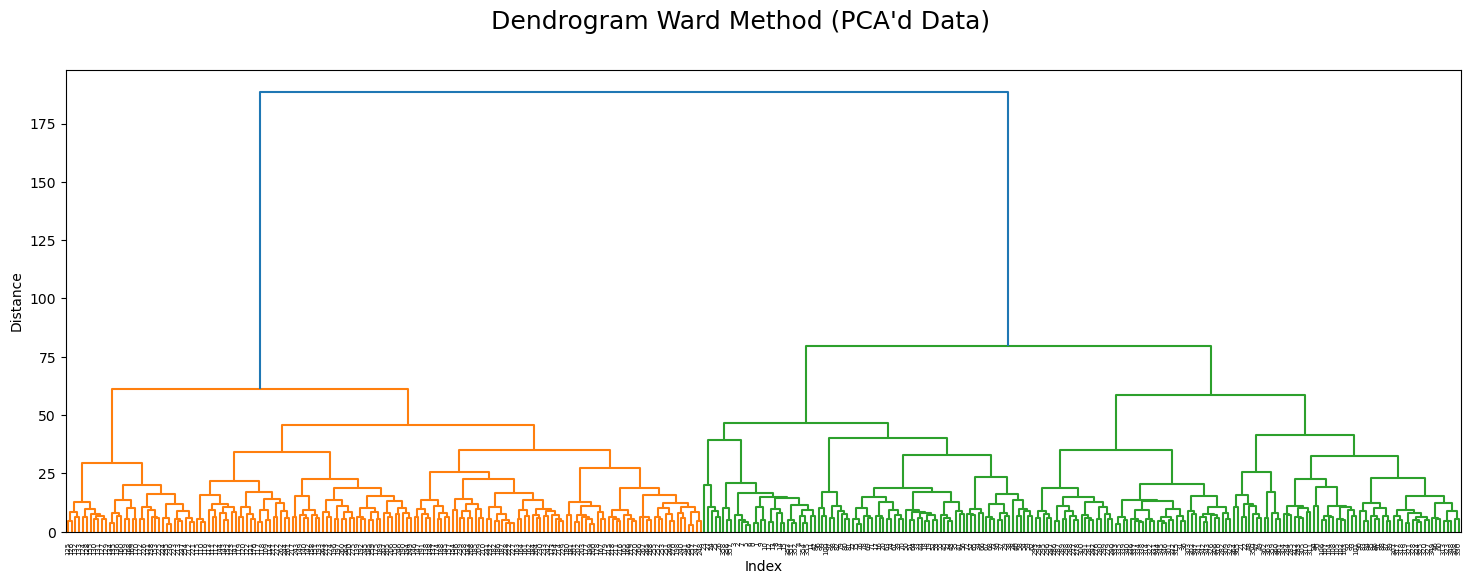

In [17]:
distance_single = linkage(dfPCA.loc[:, columns,], method = "ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method (PCA'd Data)",fontsize=18)
plt.savefig(os.path.join(path, '04 Analysis', 'PCAd Dendrogram - Ward Method.png'), bbox_inches = 'tight') # Save
plt.show()